# Activity 3.03: Creating a Stacked Bar Plot to Visualize Restaurant Performance

In [31]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
bills = sns.load_dataset('tips')
bills

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
# create a matrix where the elements contain the sum of the total bills for each day and split according to smokers/non-smokers
# df = bills.groupby(['smoker', 'day']).agg({'total_bill': sum}).reset_index().sort_values(['day', 'smoker'])
# df = df[['day', 'smoker', 'total_bill']]

df = bills.groupby(['smoker', 'day']).agg({'total_bill': sum}).unstack()
df

total_bill                         
day          Thur     Fri     Sat      Sun
smoker                                    
Yes        326.24  252.20  893.62   458.28
No         770.09   73.68  884.78  1168.88

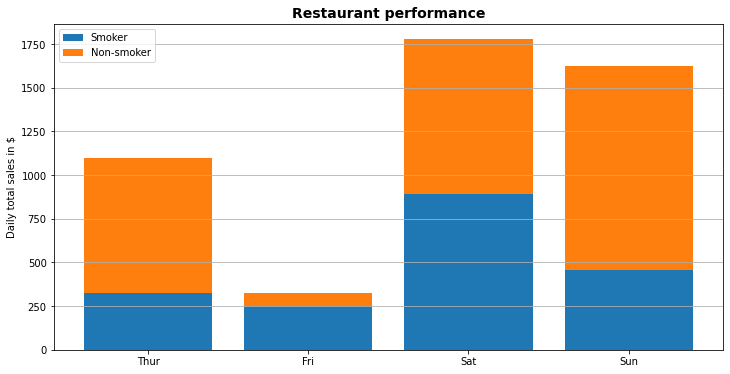

In [56]:
# Create a stacked bar plot, stacking the summed total bills separated according to smoker and non-smoker for each day

labels = df.columns.get_level_values(1)
smoker = df.loc['Yes', :]
nonsmoker = df.loc['No', :]

fig = plt.figure(figsize=(12,6))
plt.title("Restaurant performance", fontsize=14, fontweight='bold')

plt.bar(labels, smoker, label="Smoker")
plt.bar(labels, nonsmoker, bottom=smoker, label="Non-smoker")

plt.legend(loc='upper left')
plt.ylabel("Daily total sales in $")

ax = plt.gca()
ax.yaxis.grid()

plt.show()